# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

<div class="span5 alert alert-info">
<h3>Exercise Answers</h3>

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> The histogram plots using the given data tells that the distribution is close to normal, and is close to a bell curve shape. The corresponding normal test has the p-values are higher than 0.05
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> The sample size is large enough. It is much higher than '30' to make it qualify for CLT
    <li> We dont have any information that tells more about the sample subjects. Heart rate/Gender does not give too much insight either. And between M/F genders the sample sizes are of same size. We can proceed, assuming an independent sample.
    </ul>
<li>  Is the true population mean really 98.6 degrees F? ..Run a hypothesis test
    <ul>
    <li> Would you use a one-sample or two-sample test? Why? I would use one sample test. Since the hypothesis test is over an entire population, and we are not doing any test involving two groups, one-sample test is appropriate. Here, we are comparing the mean of a sample against some fixed value. Later when we do male vs female populations, two sample test could be appropriate
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>


You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [121]:
import pandas as pd
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


df = pd.read_csv('data/human_body_temperature.csv')
df= df[['temperature','gender','heart_rate']]
femaleData=df[df['gender']=='F'][['temperature','gender','heart_rate']]
maleData=df[df['gender']=='M'][['temperature','gender','heart_rate']]
# df.size
# df['temperature'].values
# print('Sample distribution over ', df[['gender']].groupby(['gender']).size())

In [122]:
import scipy.stats as stats
print('Temperature normal test', stats.normaltest(df['temperature']))
print('Female Temperature normal test', stats.normaltest(femaleData['temperature']))
print('Male Temperature normal test', stats.normaltest(maleData['temperature']))
print('HeartRate normal test', stats.normaltest(df['heart_rate']))
print('Female HeartRate normal test', stats.normaltest(femaleData['heart_rate']))
print('Male HeartRate normal test', stats.normaltest(maleData['heart_rate']))

Temperature normal test NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)
Female Temperature normal test NormaltestResult(statistic=4.7354381129083993, pvalue=0.093694193898564038)
Male Temperature normal test NormaltestResult(statistic=0.89119996669505031, pvalue=0.64043990745691226)
HeartRate normal test NormaltestResult(statistic=2.3488941072144787, pvalue=0.30898978724821446)
Female HeartRate normal test NormaltestResult(statistic=3.6382482530714473, pvalue=0.16216772715718)
Male HeartRate normal test NormaltestResult(statistic=0.24394089623065685, pvalue=0.88517452669164032)


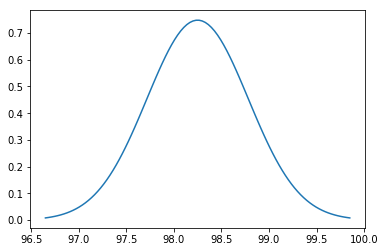

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.mlab as mlab
import math
# df['temperature'].hist()
# femaleData['temperature'].hist()
# maleData['temperature'].hist()

import numpy

# print('Mean , SD ', df['temperature'].mean(), numpy.std(df['temperature'], axis=0))
# print('Female Mean, SD ', femaleData['temperature'].mean(), numpy.std(femaleData['temperature'], axis=0))
# print('Male Mean, SD ', maleData['temperature'].mean(), numpy.std(maleData['temperature'], axis=0))

mu = df['temperature'].mean()
std=numpy.std(df['temperature'], axis=0)
sigma = std * std
x = np.linspace(mu-3*sigma,mu+3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))


# plt.plot(x, scipy.stats.norm(loc = mu, scale=std))


plt.show()

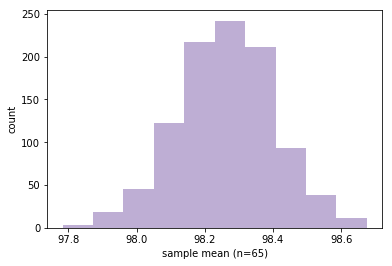

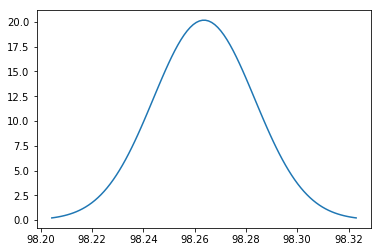

In [131]:

def make_sample(n=50):
    sampleOfSample = scipy.stats.norm(df['temperature'].values)
    sampleRV=sampleOfSample.rvs(random_state=1234)
#     print(df['temperature'].values.size, sampleRV.size, n)
    sample =numpy.random.choice(sampleRV, size=n)
    return sample

def sample_stat(sample):
    return sample.mean()

def compute_sample_statistics(n=50, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return numpy.array(stats)

sample_means = compute_sample_statistics(n=65, iters=1000)
pyplot.hist(sample_means, color='#beaed4')
pyplot.xlabel('sample mean (n=65)')
pyplot.ylabel('count')

plt.show()
('SamplingMean', 'SamplingSE', '5,95 percentile'), (sample_means.mean(), sample_means.std(), numpy.percentile(sample_means, [1, 99]))
# Your work here.

mu = sample_means.mean()
std=sample_means.std()
sigma = std * std
x = np.linspace(mu-3*sigma,mu+3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()


In [132]:
zScoreOf986 = (98.6 - mu)/std
zScoreOf986

# 98.6 is 2.39 standard deviations away from the mean


2.3916352973949775